In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""


from keras.datasets import mnist,fashion_mnist
from keras.utils import to_categorical
from keras import datasets
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


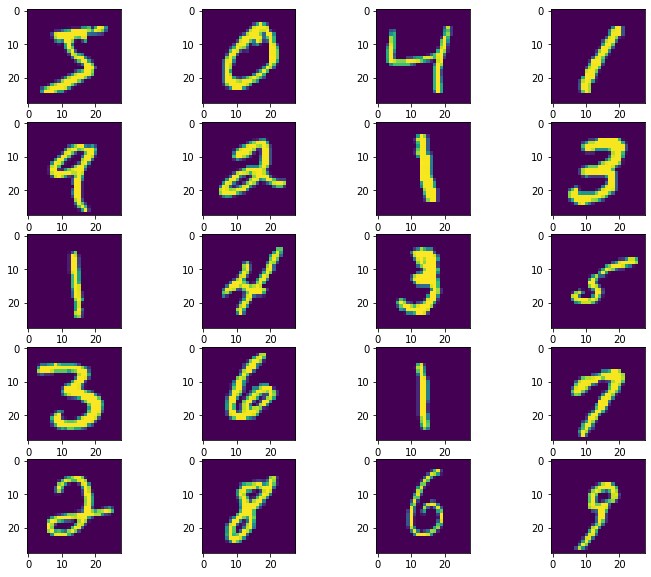

In [2]:
# load the data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# display a few images
plt.figure( figsize=(12,10))
plt.axis('off')
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i])
 

In [3]:
# reshape the x_train and x_test data
 
x_train = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test = np.reshape(x_test, (x_test.shape[0], 28*28))


#one hot encoding (data types and list)
y_train = to_categorical(y_train)
y_test_cats = y_train # keep copy to use later
y_test = to_categorical(y_test)

 

In [4]:
# build a 3 layer neural network (80, 40, 10)
# discuss classes, activations, loss functions, optimizers, metrics

model = Sequential()
model.add(Dense(80, input_shape=(784,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                62800     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 65,540
Trainable params: 65,540
Non-trainable params: 0
_________________________________________________________________


In [5]:
# fit the model, show the progression of training 
# (batch_size, epochs, validation )
model.fit(x_train,y_train, validation_split=0.1, epochs=10)
 


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 88us/step - loss: 1.4596 - acc: 0.7147 - val_loss: 0.4384 - val_acc: 0.8603
Epoch 2/10
54000/54000 [==============================] - 5s 85us/step - loss: 0.4366 - acc: 0.8850 - val_loss: 0.3336 - val_acc: 0.9162
Epoch 3/10
54000/54000 [==============================] - 5s 84us/step - loss: 0.2970 - acc: 0.9198 - val_loss: 0.2125 - val_acc: 0.9488
Epoch 4/10
54000/54000 [==============================] - 5s 85us/step - loss: 0.2243 - acc: 0.9401 - val_loss: 0.1753 - val_acc: 0.9548
Epoch 5/10
54000/54000 [==============================] - 5s 86us/step - loss: 0.1811 - acc: 0.9514 - val_loss: 0.1589 - val_acc: 0.9607
Epoch 6/10
54000/54000 [==============================] - 5s 85us/step - loss: 0.1575 - acc: 0.9573 - val_loss: 0.1502 - val_acc: 0.9638
Epoch 7/10
54000/54000 [==============================] - 4s 83us/step - loss: 0.1362 - acc: 0.9631 - val_loss: 0.1448 - val_acc

In [6]:
# evaluate the model with test data
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 32us/step


[0.15548339070551448, 0.963699996471405]

In [7]:
# compare ground truth to predictions  using test data
y_hat = model.predict(x_test)

In [8]:
# confusion matrix
# use argmax to tally counts of y_test and y_hat (conf_y, conf_y_hat)
y_cats = np.argmax(y_hat, axis=1)
y_test_cats = np.argmax(y_test, axis=1)
confusion_matrix(y_test_cats, y_cats) 

array([[ 968,    0,    1,    0,    1,    1,    1,    1,    7,    0],
       [   0, 1095,    4,    0,    0,    3,   23,    0,   10,    0],
       [   8,    0,  996,    8,    5,    0,    3,    2,   10,    0],
       [   0,    0,    6,  979,    0,    4,    0,    4,   14,    3],
       [   1,    0,    4,    0,  945,    0,   14,    0,    1,   17],
       [   5,    0,    0,   29,    2,  823,   11,    1,   18,    3],
       [   6,    1,    0,    0,    4,    3,  938,    0,    6,    0],
       [   4,    4,   22,    1,    1,    0,    0,  985,    2,    9],
       [   1,    0,    3,    5,    6,    2,    1,    3,  949,    4],
       [   4,    2,    0,    9,   19,    1,    0,    8,    7,  959]])

In [11]:
from sklearn.manifold import TSNE


y = TSNE().fit_transform(x_train)

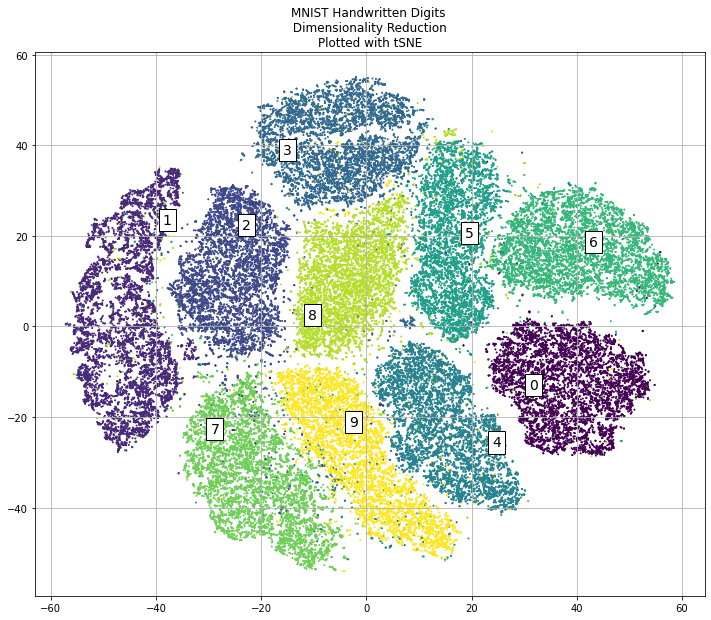

In [37]:
plt.figure(figsize=(12,10))
plt.grid()
plt.title("MNIST Handwritten Digits \n Dimensionality Reduction \nPlotted with tSNE")
plt.scatter(y[:,0], y[:,1], s=1, c = np.argmax(y_train, axis=1))
for i in range(10):
    for j in range(y_train.shape[0]):
        if(i == np.argmax(y_train[j])):
            plt.text(y[j,0], y[j,1],str(i), fontsize=14, bbox=dict(facecolor='white'))
            break

In [16]:
np.argmax(y_train, axis=1).shape

(60000,)

In [18]:
from umap import UMAP
yy = UMAP().fit_transform(x_train)

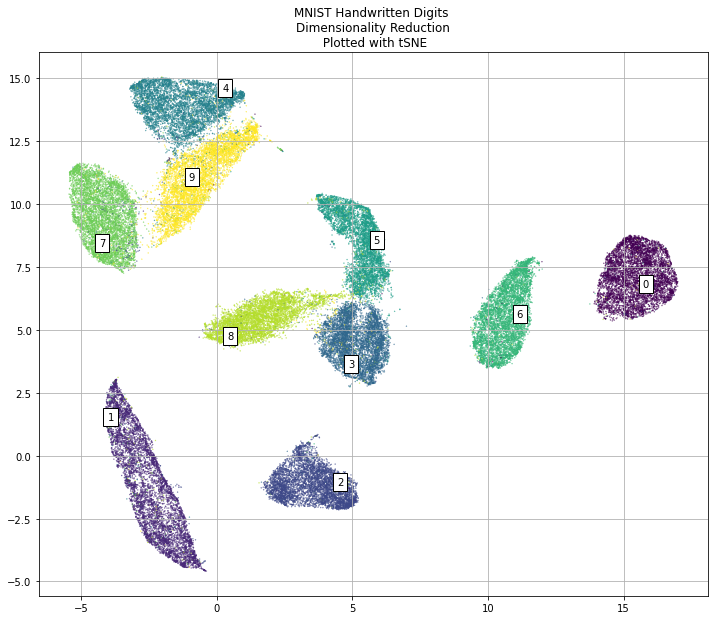

In [34]:
plt.figure(figsize=(12,10))
plt.grid()
plt.title("MNIST Handwritten Digits \nDimensionality Reduction\n Plotted with tSNE")
plt.scatter(yy[:,0], yy[:,1], s=.1,c=np.argmax(y_train,axis=1))
for i in range(10):
    for j in range(y_train.shape[0]):
        if(i == np.argmax(y_train[j])):
            plt.text(yy[j,0], yy[j,1],str(i), bbox=dict(facecolor='white'))
            break